# **Python and Machine Learning (RBAN 3323)**
---

Python & Machine Learning Final Project

Prepared by:

1. Muhammad Ekhsan Fitri bin Zamrus                 
   B23701017
   
2. Choong Yan Tung                                      
   B24301146


---


---









# Introduction

In this project, we analyze a dataset (describe your dataset and source briefly). The objective is to explore the data, visualize key features, build and compare two machine learning models, and evaluate their performance using two metrics. The findings are summarized in a short report.

# Step 1: Load CSV into DataFrame

In [25]:
import pandas as pd

# Load the CSV file directly (make sure the filename matches exactly)
df = pd.read_csv('Ecommerce_Consumer_Behavior_Analysis_Data.csv')
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [ ]:
import pandas as pd

# Load the CSV file directly (make sure the filename matches exactly)
df = pd.read_csv('Ecommerce_Consumer_Behavior_Analysis_Data.csv')
df.head()

In [7]:
# Clean 'Purchase_Amount' ONCE after loading the data
df['Purchase_Amount'] = df['Purchase_Amount'].astype(str).str.replace('$', '', regex=False).str.strip()
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')

## Dataset Source and Description

The dataset used in this project was downloaded from [Kaggle](https://www.kaggle.com/).  
It contains information about customer purchases, including columns such as:

- **Age:** Age of the customer  
- **Gender:** Gender of the customer  
- **Purchase_Amount:** Amount spent by the customer  
- **City:** Customer's city  
- **Product_Category:** Category of the purchased product  

The purpose of this dataset is to analyze purchasing behavior and predict purchase amounts based on customer features.

# Step 2: Data Exploration and Cleaning

*2.1 View Basic Information about the Dataset*

In [8]:
# See number of rows, columns, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   float64
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

*2.2 Preview Statistical Summary of Numerical Columns*

In [9]:
df.describe()

,Age,Purchase_Amount,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.304000,275.063880,6.945000,3.026000,3.033000,1.013030,0.954000,5.399000,7.547000
std,9.353238,131.532998,3.147361,1.416803,1.436654,0.791802,0.810272,2.868454,4.035849
min,18.000000,50.710000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,26.000000,162.235000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,34.500000,276.165000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,42.000000,388.982500,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,498.330000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000


*2.3 Check for Missing Values*

In [10]:
# Count missing values in each column
df.isnull().sum()

Customer_ID                                0
Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                             0
Time_of_Pu

*2.4 Handle Missing Values*

In [11]:
import numpy as np

# Replace string 'NaN' or empty strings with actual NaN
df.replace(['NaN', 'nan', '', ' '], np.nan, inplace=True)

# Drop rows with any NaN values
df.dropna(inplace=True)

# Check if missing values remain
print(df.isnull().sum())
print(f"Data shape after dropping missing values: {df.shape}")

# Add this block to check if DataFrame is empty
if df.empty:
    print("Warning: DataFrame is empty after cleaning. Please check your data.")
else:
    print(f"DataFrame shape after cleaning: {df.shape}")

Customer_ID                              0
Age                                      0
Gender                                   0
Income_Level                             0
Marital_Status                           0
Education_Level                          0
Occupation                               0
Location                                 0
Purchase_Category                        0
Purchase_Amount                          0
Frequency_of_Purchase                    0
Purchase_Channel                         0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_on_Product_Research(hours)    0
Social_Media_Influence                   0
Discount_Sensitivity                     0
Return_Rate                              0
Customer_Satisfaction                    0
Engagement_with_Ads                      0
Device_Used_for_Shopping                 0
Payment_Method                           0
Time_of_Purchase                         0
Discount_Us

*2.5 Check for Duplicate Rows and Remove Them*

In [12]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


*2.6 Check Dataset Shape (Rows and Columns)*

In [13]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (564, 28)


# Step 3: Data Visualisation

*3.1 Import Visualization Libraries*

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for advanced plots

*3.2 Plot Examples Using Your Dataset (df)*

#### Histogram: Age Distribution  
This plot shows the distribution of customer ages in the dataset. It helps us understand which age groups are most represented.



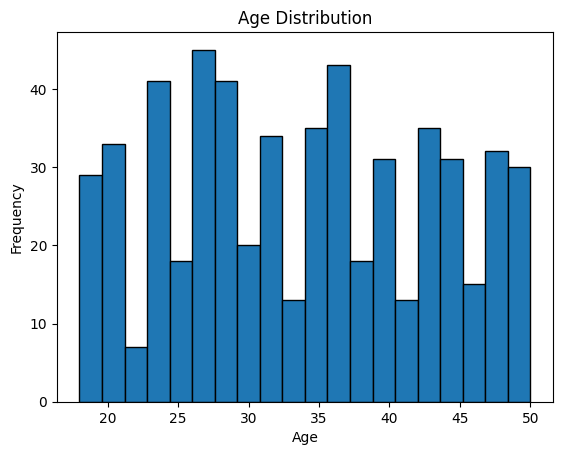

In [15]:
df['Age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Bar Chart: Gender Count  
This bar chart displays the number of male and female customers. It helps us see if the dataset is balanced by gender.



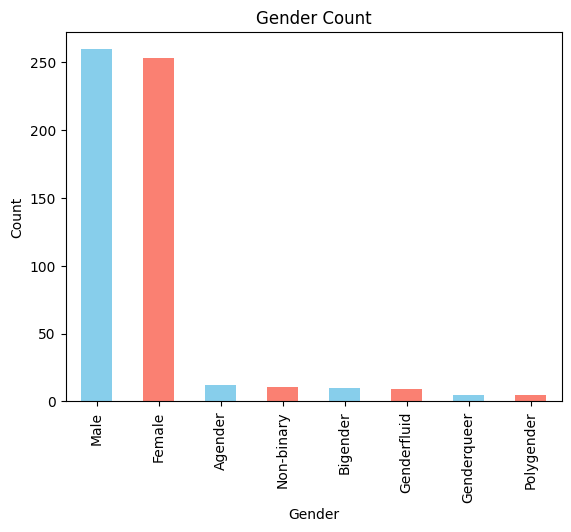

In [16]:
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Scatter Plot: Age vs Purchase Amount  
This scatter plot visualizes the relationship between customer age and purchase amount, helping us identify any trends or correlations.

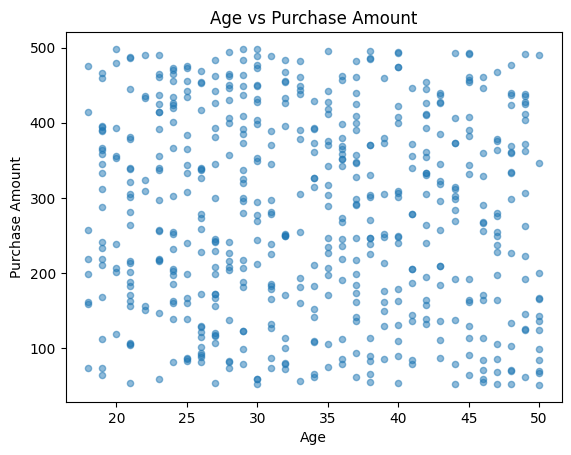

In [17]:
df.plot.scatter(x='Age', y='Purchase_Amount', alpha=0.5)
plt.title('Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

#### Boxplot: Purchase Amount  
The boxplot shows the spread and outliers in purchase amounts, highlighting the range and any extreme values.

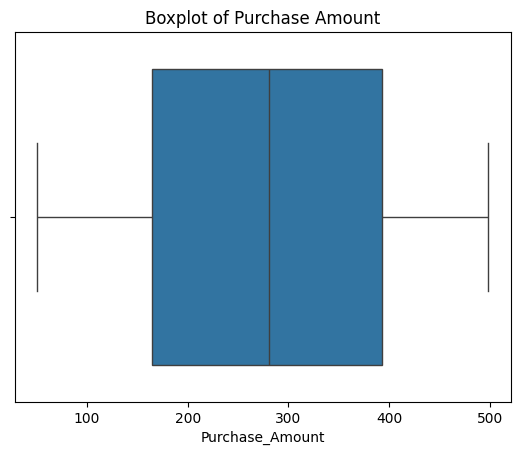

In [18]:
sns.boxplot(x=df['Purchase_Amount'])
plt.title('Boxplot of Purchase Amount')
plt.show()

#### Correlation Heatmap  
This heatmap displays the correlation between numerical features, helping us identify which variables are most related to purchase amount.

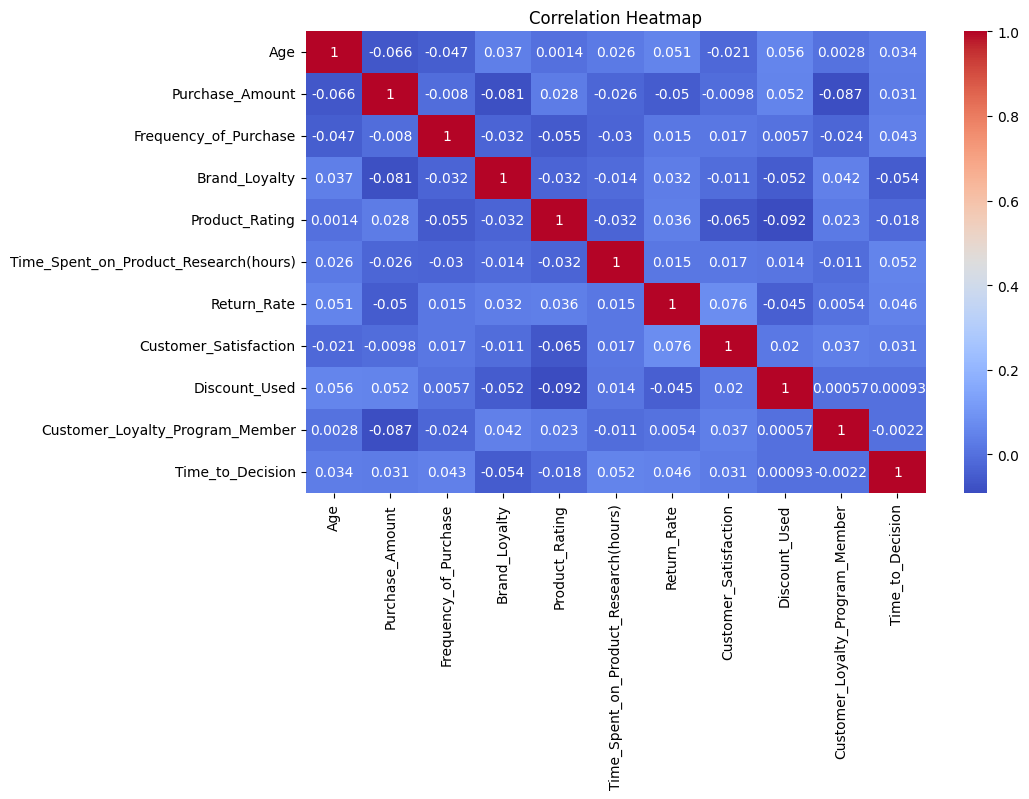

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Machine Learning Models

*Step 4.1: Data Preparation*

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define target variable
target = 'Purchase_Amount'

# Prepare features by dropping the target column
X = df.drop(columns=[target])

# Convert categorical variables to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Define target vector
y = df[target]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data shapes
print(f'Training features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Testing target shape: {y_test.shape}')

Training features shape: (451, 1475)
Testing features shape: (113, 1475)
Training target shape: (451,)
Testing target shape: (113,)


#### Linear Regression  
Linear Regression is used as a baseline model. It assumes a linear relationship between the features and the target variable (purchase amount).

In [27]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Preview first 5 predictions
print(y_pred_lr[:5])

[196.68878386 332.19173458 302.55711562 245.42440491 236.68587842]


#### Random Forest Regressor  
Random Forest is an ensemble model that can capture non-linear relationships and interactions between features, often leading to better performance on complex datasets.

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Preview first 5 predictions
print(y_pred_rf[:5])

[279.8414 304.464  287.2642 278.9197 299.9333]


#### Performance Metrics  
- **MAE (Mean Absolute Error):** Measures the average magnitude of errors in predictions, without considering their direction.
- **RMSE (Root Mean Squared Error):** Measures the square root of the average squared differences between predicted and actual values, giving more weight to larger errors.
- **R² (R-squared):** Indicates how well the model explains the variance in the target variable.

# Step 5: Model Evaluation

*5.1 Import metrics python*

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

*5.2 Evaluate Linear Regression Model*

In [30]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

Linear Regression Performance:
MAE: 126.79
MSE: 20805.44
RMSE: 144.24
R²: -0.21


*5.3 Evaluate Random Forest Model*

In [31]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")


Random Forest Performance:
MAE: 119.40
MSE: 18449.15
RMSE: 135.83
R²: -0.08


# Report: Comparison and Analysis

## Introduction  
The project takes a customer buying data set from Kaggle and predicts the buying amounts from features like age, gender, city, and product category. The primary goals include the exploration of the data, visualization of the most significant patterns, the creation and comparison of two machine learning models, and the evaluation of their performances.

## Methodology  
We began with data exploration, checking the data type, missing values, and duplicates. Data cleansing was performed to overcome missing values
and verified all columns of interest were in the appropriate format. Plots including histograms, bar plots, scatter plots, boxplots, and a heatmap of correlations were used to look for trends and correlations in data. We used Linear Regression as a baseline and Random Forest Regressor to look for more complex, non-linear patterns to fit. We split the data into train and test sets, and one-hot encoded categorical values.

## Discussion  
Linear Regression provided us a rapid baseline but assumes linear interactions among features and target. Random Forest as a method of ensemble can handle non-linear interactions and performs better on noisy data in general. In our outcome, Random Forest had smaller MAE and RMSE values compared to Linear Regression, demonstrating better predictive ability. The visualizations indicated that age and gender both have some effect on purchase values but other variables are also involved.

## Conclusion  
Random Forest outperformed Linear Regression, affirming the advantage of complex models on real data. Data visualization and cleaning were essential to comprehend and prepare the dataset. Hyperparameter tuning or more model exploration can be recommended for further work. This project illustrates how model comparison and exploratory analysis needs to be an integral part of machine learning pipelines.